Build a simple linear regression model for Fish Species Weight Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

In [2]:
data = pd.read_csv('Fish.csv')

print(data.head())



  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [3]:
#Let's find some missing values in the data

data.isnull().sum()


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [4]:
data.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'},inplace = True) 
data.sample(5)



,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
87,Perch,120.0,20.0,22.0,23.5,5.6400,3.5250
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
24,Bream,700.0,31.9,35.0,40.5,16.2405,5.5890
111,Perch,840.0,32.5,35.0,37.3,11.4884,7.7957
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


In [5]:
data.shape


(159, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [8]:
data_sp = data.Species.value_counts()

data_sp = pd.DataFrame(data_sp)

data_sp.T



,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


In [9]:
new_data = data.drop([40])

print("New dimension of the dataset is :-" , new_data.shape)

print(new_data.head())



New dimension of the dataset is :- (158, 7)
  Species  Weight  VerticalLen  DiagonalLen  CrossLen   Height   Width
0   Bream   242.0         23.2         25.4      30.0  11.5200  4.0200
1   Bream   290.0         24.0         26.3      31.2  12.4800  4.3056
2   Bream   340.0         23.9         26.5      31.1  12.3778  4.6961
3   Bream   363.0         26.3         29.0      33.5  12.7300  4.4555
4   Bream   430.0         26.5         29.0      34.0  12.4440  5.1340


In [10]:
new_data2 = new_data.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis =1) # Can also use axis = 'columns'
print('New dimension of dataset is= ', new_data2.shape)
new_data2.head()

New dimension of dataset is=  (158, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


Text(0.5, 1.0, 'Outlier Detection based on weight')

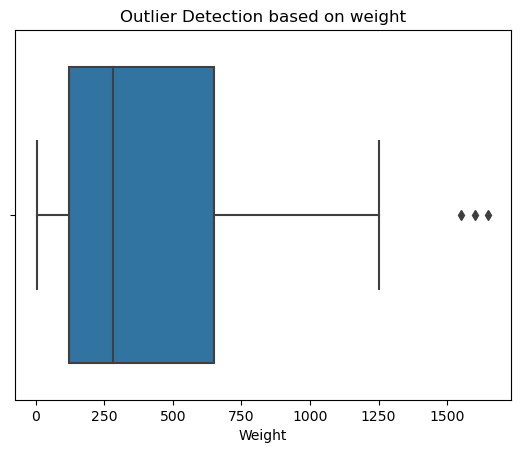

In [11]:
sns.boxplot(x = new_data2['Weight'])
plt.title("Outlier Detection based on weight")

In [12]:
def outlier_detection(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3-Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    Outlier = dataframe[(dataframe>upper_end)| (dataframe<lower_end)]
    return Outlier



In [13]:
outlier_detection(new_data2['Weight'])



142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Outlier detection based on height ')

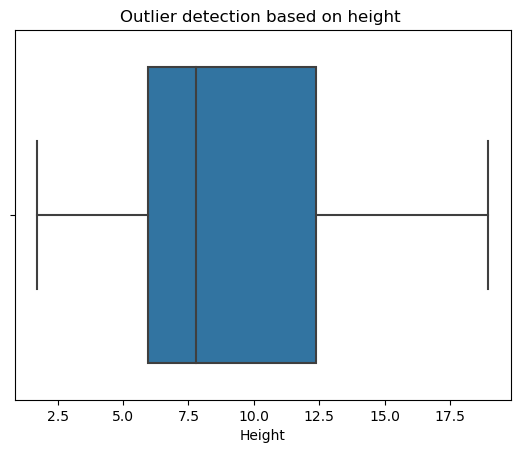

In [14]:
sns.boxplot(x = new_data2['Height'])
plt.title("Outlier detection based on height ")



Text(0.5, 1.0, 'Outlier Detection based on Width')

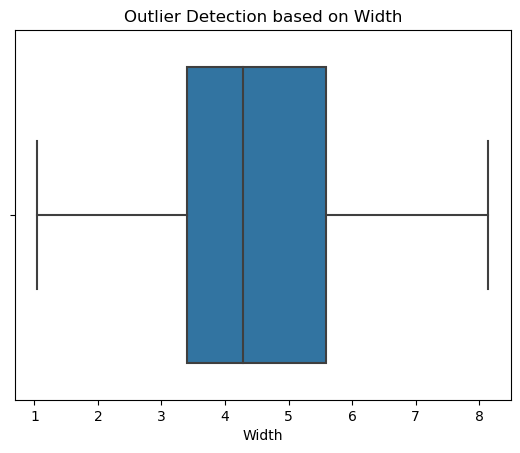

In [15]:
sns.boxplot(x = new_data['Width'])
plt.title("Outlier Detection based on Width")



In [16]:
data3 = new_data2.drop([142 , 143 , 144])

data3.shape




(155, 4)

In [17]:
data3.describe().T


,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


In [18]:
X = data3[['Height', 'Width']]
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [19]:
y = data3['Weight']

y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42) 
# Use paramter 'random_state=1' if you want keep results same everytime you execute above code
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (124, 2)
X_test dimension=  (31, 2)
y_train dimension=  (124,)
y_train dimension=  (31,)


In [21]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
print('coef:' , model.coef_)
print('Intercept:' ,model.intercept_)




coef: [ 10.40686081 151.73209963]
Intercept: -386.1676143554406


In [23]:
print('Score is :' , model.score(X_test , y_test))

Score is : 0.8960229976573091


In [24]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Weight,110.000000,7.500000,955.000000,1000.0000,850.000000,55.000000,150.000000,10.000000,19.700000,200.000000,...,500.000000,500.000000,700.000000,273.000000,430.000000,225.000000,140.000000,120.000000,130.000000,1000.000000
Predicted Weight,212.481055,-189.636049,756.728427,813.0023,816.240658,38.098095,218.321182,-168.334196,-42.610188,277.385406,...,419.788276,514.386807,630.875714,358.001479,384.100355,254.628228,186.506555,207.382732,216.491025,896.328271


In [25]:
def Visualize():
    plt.scatter(X_test['Width'], y_test , color= 'red' , label = 'Actual Weight')
    plt.scatter(X_test['Width']  , model.predict(X_test) , color = 'green' , label = 'Predicted Weight' )
    plt.xlabel('Width')
    plt.ylabel('Weight')
    plt.rcParams["figure.figsize"] = (10,6)
    plt.title('Actual vs Predicted weight for Test Data')
    plt.legend()
    plt.show()
    
    

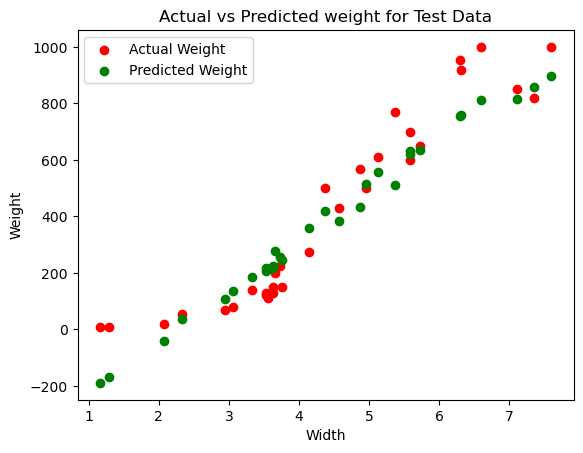

In [26]:
Visualize()


C:\Users\hjha0\AppData\Local\Temp\ipykernel_12584\1508723769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-model.predict(X_test)))


Text(0.5, 1.0, 'Histogram of Residuals')

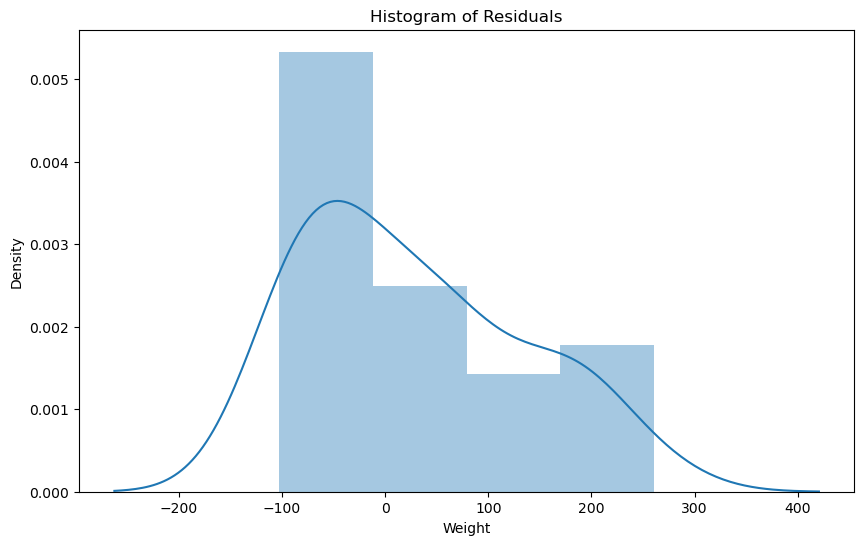

In [27]:
#Evaluate the model
sns.distplot((y_test-model.predict(X_test)))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")